In [1]:
from General_function import *
from GA_function import *
import random
import numpy as np
import yaml

In [2]:
with open(file='DATA.yaml', mode='r', encoding='UTF-8') as f:
    data = yaml.safe_load(f)
    
target = data['TARGET']
generation = data['GENERATION']

In [3]:
C_history = []
ga = GeneticAlgorithm(target)
print(f'数据集{target}理论最优值：{ga.Optimum}')
print(f'第0代种群，Cmax={ga.C_max}')
C_history.append(ga.C_max)

for gen in range(1, generation+1):
    cross_index1 = np.array(ga.Fit).argmax()
    for cross_index2 in range(ga.PopSize):
        if (random.random() <= ga.P_Cross) and (cross_index1 != cross_index2):
            ga.Cross(cross_index1, cross_index2)

    for mutation_index in range(ga.PopSize):
        if (random.random() <= ga.P_Mutation) and (cross_index1 != mutation_index):
            ga.Mutation(mutation_index)

    if gen % 10 == 0:
        print(f'第{gen}代种群，Cmax={ga.C_max}')
    C_history.append(ga.C_max)

    if ga.C_max == ga.Optimum:
        break

数据集la02理论最优值：655
第0代种群，Cmax=753.0
第50代种群，Cmax=667.0


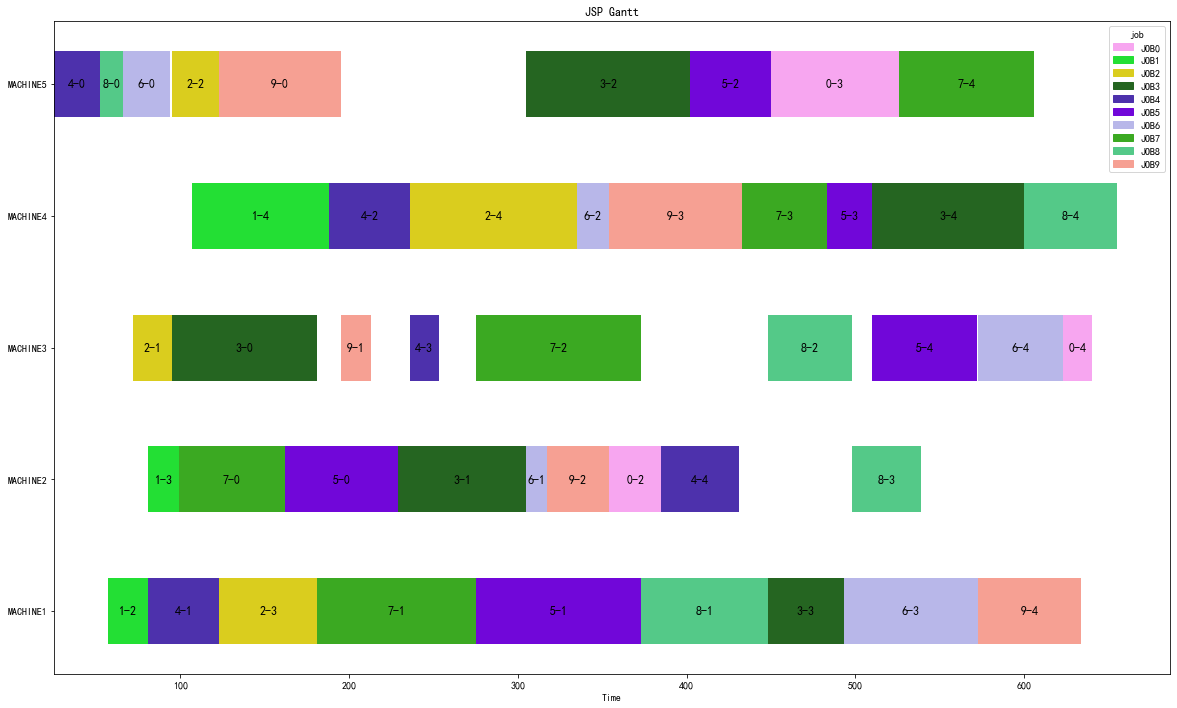

In [4]:
draw_Gantt(ga.T_op)

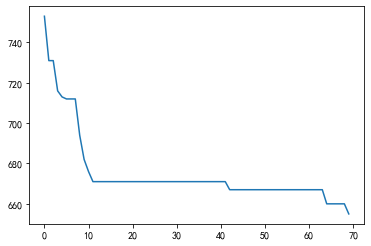

In [5]:
plt.plot(C_history)
plt.show()